Model training complete.
Mean Squared Error: 0.0219


C:\Users\atat7\AppData\Local\Temp\ipykernel_40216\1336434958.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]


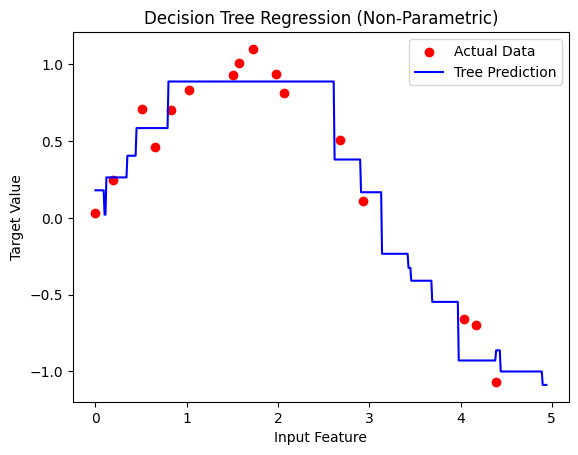

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class HousePricePredictor:
    """
    A wrapper class for a Decision Tree Regressor to demonstrate 
    non-parametric regression for a Pair Programming workshop.
    """
    def __init__(self, max_depth=5):
        # max_depth is a hyperparameter. Limiting it prevents the tree 
        # from 'memorizing' the noise in the data (overfitting).
        self.model = DecisionTreeRegressor(max_depth=max_depth)
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def prepare_data(self, X, y):
        """
        Splits data into training and testing sets.
        Talking point: We use 20% of data for testing to evaluate 
        how the model performs on unseen data.
        """
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

    def train(self):
        """
        Fits the Decision Tree to the training data.
        Talking point: The tree 'learns' by recursively splitting the data 
        into branches that minimize variance within the leaf nodes.
        """
        if self.X_train is None:
            raise ValueError("Data not prepared. Call prepare_data() first.")
        self.model.fit(self.X_train, self.y_train)
        print("Model training complete.")

    def evaluate(self):
        """
        Calculates the Mean Squared Error (MSE).
        Talking point: MSE measures the average squared difference between 
        predicted and actual values. Lower is better!
        """
        predictions = self.model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, predictions)
        return mse

    def plot_results(self, X):
        """
        Visualizes the 'Staircase' effect of a Decision Tree Regressor.
        Talking point: Unlike Linear Regression's smooth line, Trees create 
        constant approximation steps.
        """
        X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]
        y_grid = self.model.predict(X_grid)

        plt.scatter(self.X_test, self.y_test, color='red', label='Actual Data')
        plt.plot(X_grid, y_grid, color='blue', label='Tree Prediction')
        plt.title('Decision Tree Regression (Non-Parametric)')
        plt.xlabel('Input Feature')
        plt.ylabel('Target Value')
        plt.legend()
        plt.show()

# --- Execution Block for VS Code ---
if __name__ == "__main__":
    # 1. Generate synthetic data (e.g., a noisy sine wave)
    # Talking point: Trees are great at capturing non-linear patterns.
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel() + (0.1 * rng.randn(80))

    # 2. Initialize our custom class
    predictor = HousePricePredictor(max_depth=4)

    # 3. Process, Train, and Evaluate
    predictor.prepare_data(X, y)
    predictor.train()
    error = predictor.evaluate()

    print(f"Mean Squared Error: {error:.4f}")

    # 4. Visualize the "steps"
    predictor.plot_results(X)